In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the data from the Excel file into a DataFrame
df = pd.read_excel("/content/ajet data update.xlsx")

# Display the first few rows of the DataFrame
df.head()


,Gender,Age (Months),Income Level,Distance to Health Facility (km),Immunization Completion,Vaccines Received,Mother's Knowledge of Immunization,Mother's Occupation
0,Male,9.0,Moderate,4.0,Fully Completed,"BCG, Hepatitis B, Pentavalent, OPV, PCV",Slightly Knowledgeable,Farmer
1,Female,8.0,Low,5.0,Fully Completed,"BCG, Hepatitis B",Not Knowledgeable,Housewife
2,Female,5.0,Low,2.0,Partially Completed,"BCG, Hepatitis B, Pentavalent, OPV, PCV",Moderately Knowledgeable,Trader
3,Female,23.0,Low,3.0,Partially Completed,"BCG, Hepatitis B, Pentavalent, OPV, PCV, RV, MMR",Very Knowledgeable,Nurse
4,Female,6.0,Low,6.0,Fully Completed,"BCG, Hepatitis B, Pentavalent, OPV",Moderately Knowledgeable,Farmer


In [145]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Gender                              8809 non-null   object 
 1   Age (Months)                        8769 non-null   float64
 2   Income Level                        8809 non-null   object 
 3   Distance to Health Facility (km)    8808 non-null   float64
 4   Immunization Completion             8809 non-null   object 
 5   Vaccines Received                   8809 non-null   object 
 6   Mother's Knowledge of Immunization  8809 non-null   object 
 7   Mother's Occupation                 8809 non-null   object 
dtypes: float64(2), object(6)
memory usage: 550.7+ KB


**DATA PREPROCESSING AND CLEANING**

In [146]:
# Check for missing values in columns
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Gender                                 0
Age (Months)                          40
Income Level                           0
Distance to Health Facility (km)       1
Immunization Completion                0
Vaccines Received                      0
Mother's Knowledge of Immunization     0
Mother's Occupation                    0
dtype: int64


In [147]:
df = df.dropna()

In [148]:
# Check for missing values in columns
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Gender                                0
Age (Months)                          0
Income Level                          0
Distance to Health Facility (km)      0
Immunization Completion               0
Vaccines Received                     0
Mother's Knowledge of Immunization    0
Mother's Occupation                   0
dtype: int64


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8768 entries, 0 to 8808
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Gender                              8768 non-null   object 
 1   Age (Months)                        8768 non-null   float64
 2   Income Level                        8768 non-null   object 
 3   Distance to Health Facility (km)    8768 non-null   float64
 4   Immunization Completion             8768 non-null   object 
 5   Vaccines Received                   8768 non-null   object 
 6   Mother's Knowledge of Immunization  8768 non-null   object 
 7   Mother's Occupation                 8768 non-null   object 
dtypes: float64(2), object(6)
memory usage: 616.5+ KB


**EXploratory data analysis**

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

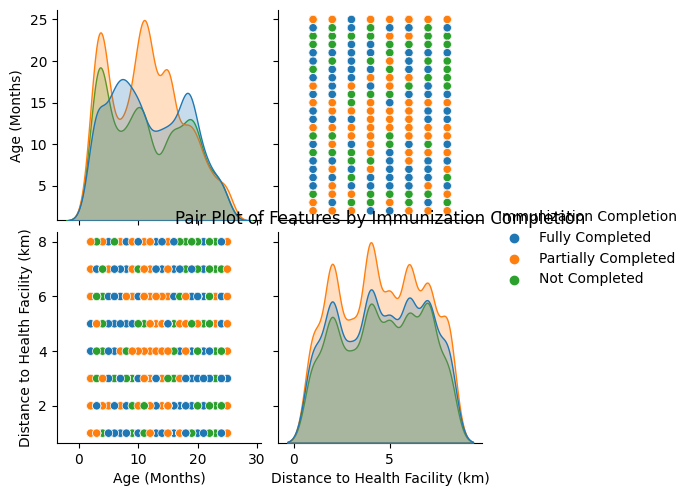

In [151]:
# Create a pair plot to visualize patterns between features
sns.pairplot(df, hue='Immunization Completion')
plt.title("Pair Plot of Features by Immunization Completion")
plt.show()

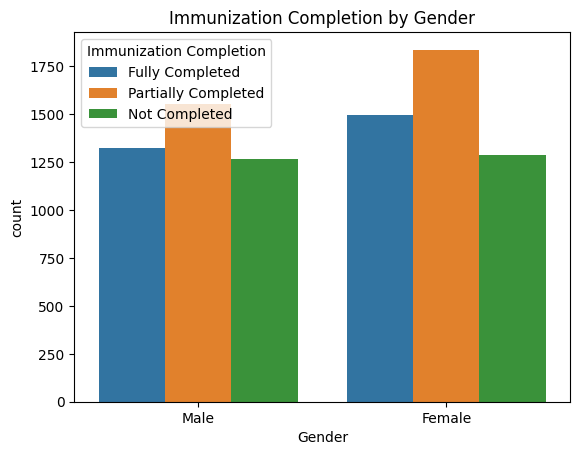

In [152]:
# Countplot of Immunization Completion by Gender
sns.countplot(x='Gender', hue='Immunization Completion', data=df)
plt.title("Immunization Completion by Gender")
plt.show()

In [153]:
# Create a crosstab to get counts
cross_tab = pd.crosstab(df['Gender'], df['Immunization Completion'])

# Calculate percentages within each category
percentage_table = cross_tab.div(cross_tab.sum(1), axis=0) * 100
percentage_table

Immunization Completion,Fully Completed,Not Completed,Partially Completed
Gender,,,
Female,32.381570,27.882327,39.736102
Male,31.917973,30.542823,37.539204


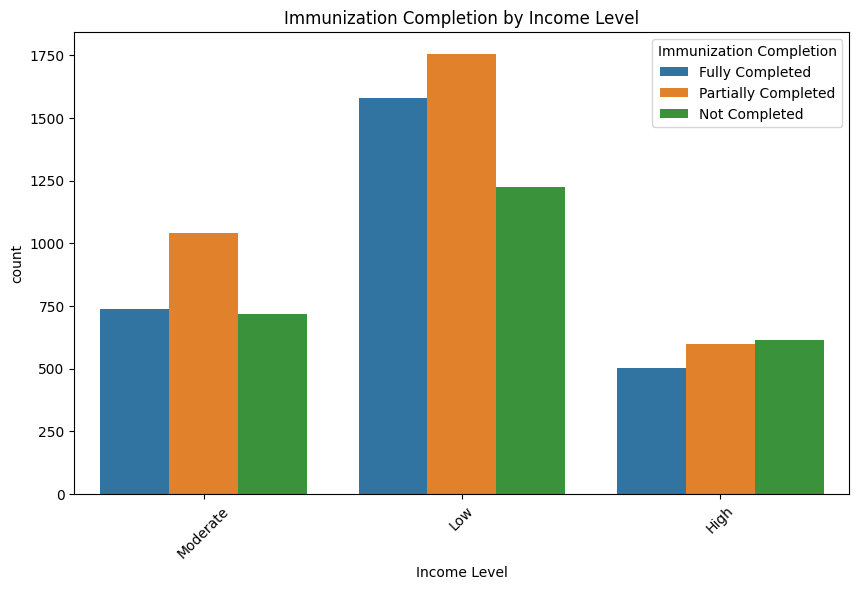

In [154]:
# Countplot of Immunization Completion by Income Level
plt.figure(figsize=(10, 6))
sns.countplot(x='Income Level', hue='Immunization Completion', data=df)
plt.title("Immunization Completion by Income Level")
plt.xticks(rotation=45)
plt.show()

In [157]:
# Create a crosstab to get counts
cross_tab2 = pd.crosstab(df["Income Level"], df['Immunization Completion'])

# Calculate percentages within each category
percentage_table2 = cross_tab2.div(cross_tab2.sum(1), axis=0) * 100
percentage_table2

Immunization Completion,Fully Completed,Not Completed,Partially Completed
Income Level,,,
High,29.346558,35.822637,34.830805
Low,34.620448,26.875823,38.503730
Moderate,29.607372,28.685897,41.706731


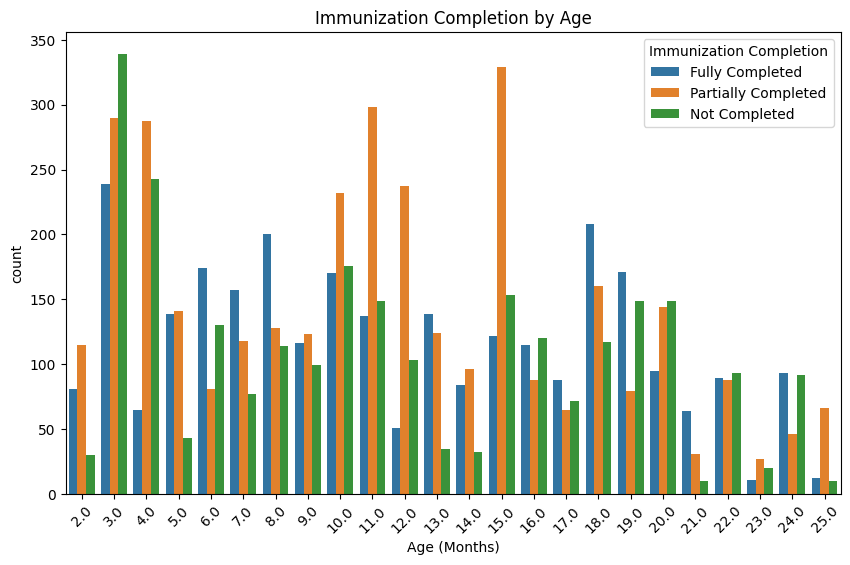

In [158]:
# Countplot of Immunization Completion by Mother's age
plt.figure(figsize=(10, 6))
sns.countplot(x='Age (Months)', hue='Immunization Completion', data=df)
plt.title("Immunization Completion by Age")
plt.xticks(rotation=45)
plt.show()

**Feature Engineering**

In [159]:
# Convert categorical variables to numerical using one-hot encoding
categorical_columns = ['Immunization Completion','Gender', 'Income Level', 'Mother\'s Occupation',
                       'Vaccines Received', 'Mother\'s Knowledge of Immunization']
df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8768 entries, 0 to 8808
Data columns (total 33 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Age (Months)                                                        8768 non-null   float64
 1   Distance to Health Facility (km)                                    8768 non-null   float64
 2   Immunization Completion_Fully Completed                             8768 non-null   uint8  
 3   Immunization Completion_Not Completed                               8768 non-null   uint8  
 4   Immunization Completion_Partially Completed                         8768 non-null   uint8  
 5   Gender_Female                                                       8768 non-null   uint8  
 6   Gender_Male                                                         8768 non-null   uint8  
 7   Income Level_Hi

In [160]:
# Calculate correlations focusing on "Immunization Completion_Fully Completed"
correlation_with_completion = df_encoded.corr()["Immunization Completion_Fully Completed"]
correlation_with_completion


Age (Months)                                                          0.035824
Distance to Health Facility (km)                                      0.000460
Immunization Completion_Fully Completed                               1.000000
Immunization Completion_Not Completed                                -0.441554
Immunization Completion_Partially Completed                          -0.547069
Gender_Female                                                         0.004955
Gender_Male                                                          -0.004955
Income Level_High                                                    -0.029716
Income Level_Low                                                      0.054755
Income Level_Moderate                                                -0.034507
Mother's Occupation_Business Owner                                    0.008185
Mother's Occupation_Doctor                                            0.007771
Mother's Occupation_Engineer                        

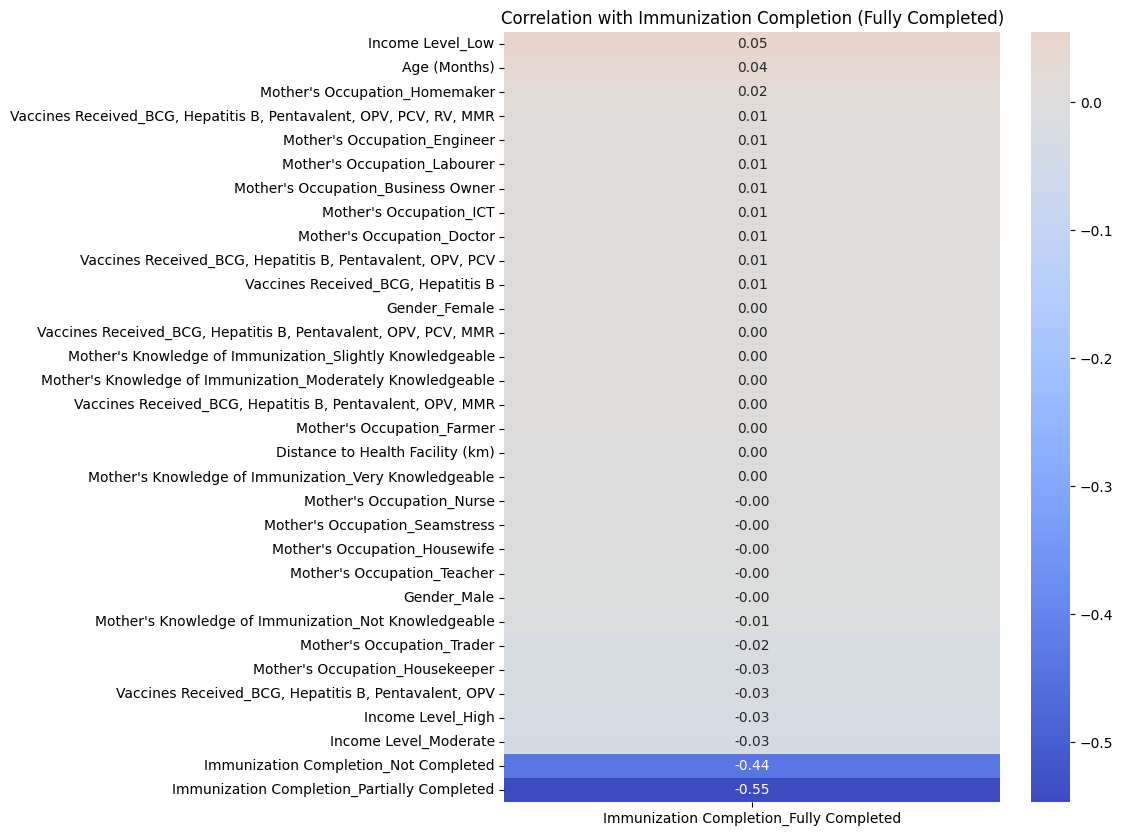

In [161]:
# Sort correlations in descending order
sorted_correlations = correlation_with_completion.drop("Immunization Completion_Fully Completed").sort_values(ascending=False)

# Plot the correlation heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(sorted_correlations.to_frame(), annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation with Immunization Completion (Fully Completed)")
plt.show()

In [162]:
# Calculate correlations focusing on "Vaccines Received_BCG, Hepatitis B, Pentavalent, OPV, PCV, RV, MMR"
correlation_with_MMR = df_encoded.corr()["Vaccines Received_BCG, Hepatitis B, Pentavalent, OPV, PCV, RV, MMR"]
correlation_with_MMR

Age (Months)                                                         -0.001054
Distance to Health Facility (km)                                     -0.223671
Immunization Completion_Fully Completed                               0.011625
Immunization Completion_Not Completed                                -0.006209
Immunization Completion_Partially Completed                          -0.005356
Gender_Female                                                        -0.010637
Gender_Male                                                           0.010637
Income Level_High                                                    -0.010502
Income Level_Low                                                      0.021709
Income Level_Moderate                                                -0.014805
Mother's Occupation_Business Owner                                    0.281725
Mother's Occupation_Doctor                                            0.340117
Mother's Occupation_Engineer                        

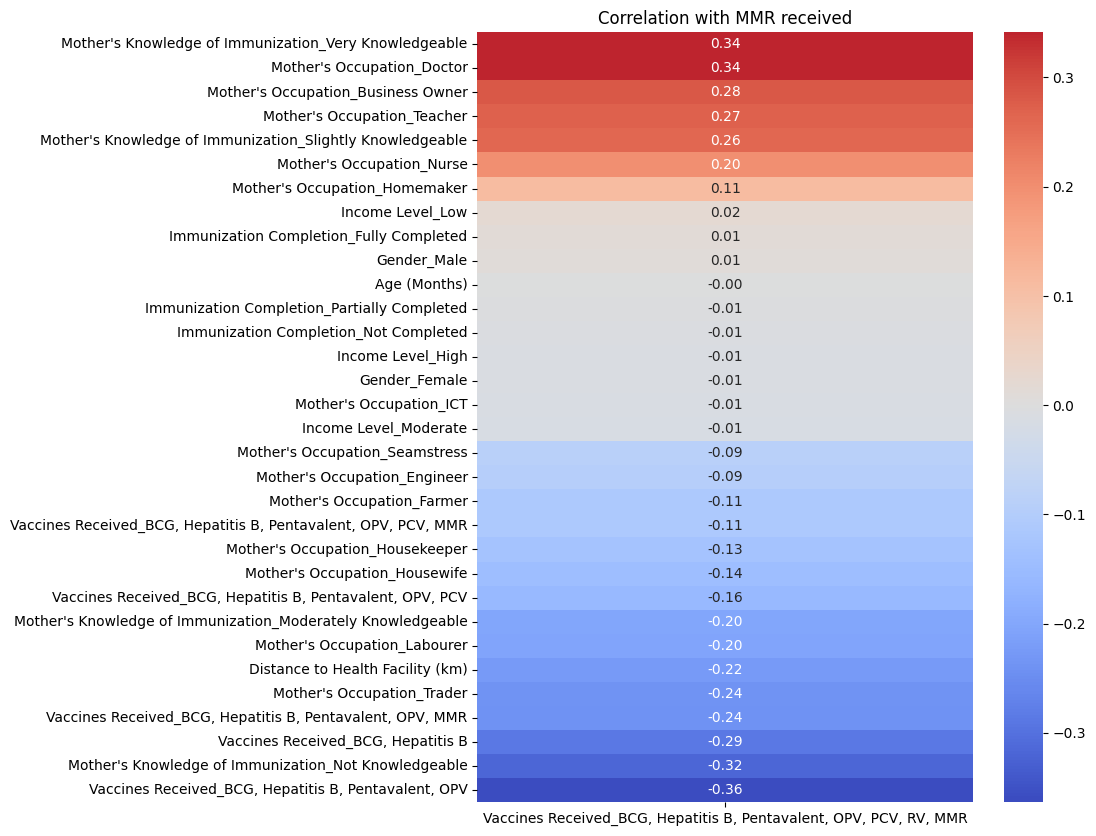

In [163]:
# Sort correlations in descending order
sorted_correlations2 = correlation_with_MMR.drop("Vaccines Received_BCG, Hepatitis B, Pentavalent, OPV, PCV, RV, MMR").sort_values(ascending=False)

# Plot the correlation heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(sorted_correlations2.to_frame(), annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation with MMR received")
plt.show()

In [164]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8768 entries, 0 to 8808
Data columns (total 33 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Age (Months)                                                        8768 non-null   float64
 1   Distance to Health Facility (km)                                    8768 non-null   float64
 2   Immunization Completion_Fully Completed                             8768 non-null   uint8  
 3   Immunization Completion_Not Completed                               8768 non-null   uint8  
 4   Immunization Completion_Partially Completed                         8768 non-null   uint8  
 5   Gender_Female                                                       8768 non-null   uint8  
 6   Gender_Male                                                         8768 non-null   uint8  
 7   Income Level_Hi

In [165]:
# Separate features (X) and target variable (y)
X = df_encoded.drop(columns=['Vaccines Received_BCG, Hepatitis B, Pentavalent, OPV, PCV, RV, MMR','Immunization Completion_Fully Completed', 'Immunization Completion_Not Completed','Immunization Completion_Partially Completed' ])
y = df_encoded['Vaccines Received_BCG, Hepatitis B, Pentavalent, OPV, PCV, RV, MMR']

In [169]:
# Split the dataset into training and testing sets
test_size = 0.2  # Adjust the test size as needed
random_state = 24  # Set the random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7014, 29)
X_test shape: (1754, 29)
y_train shape: (7014,)
y_test shape: (1754,)


In [170]:
# Standardize the features by scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Principal Component Analysis (PCA)

In [172]:
num_components = 20
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Display the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Explained Variance Ratio (Component {i}): {ratio:.4f}")

Explained Variance Ratio (Component 1): 0.1183
Explained Variance Ratio (Component 2): 0.0947
Explained Variance Ratio (Component 3): 0.0710
Explained Variance Ratio (Component 4): 0.0689
Explained Variance Ratio (Component 5): 0.0611
Explained Variance Ratio (Component 6): 0.0585
Explained Variance Ratio (Component 7): 0.0566
Explained Variance Ratio (Component 8): 0.0477
Explained Variance Ratio (Component 9): 0.0449
Explained Variance Ratio (Component 10): 0.0396
Explained Variance Ratio (Component 11): 0.0387
Explained Variance Ratio (Component 12): 0.0379
Explained Variance Ratio (Component 13): 0.0374
Explained Variance Ratio (Component 14): 0.0363
Explained Variance Ratio (Component 15): 0.0345
Explained Variance Ratio (Component 16): 0.0339
Explained Variance Ratio (Component 17): 0.0331
Explained Variance Ratio (Component 18): 0.0198
Explained Variance Ratio (Component 19): 0.0178
Explained Variance Ratio (Component 20): 0.0139


**Model Training and Evaluation**

**Logistic** **Regression**


In [173]:
# Initialize and train Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l2')  # Example with 'liblinear' solver and L2 regularization
logreg_model.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [174]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(logreg_model, X_train_pca, y_train, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.99073414 0.99073414 0.99215966 0.99287242 0.98858773]
Mean Cross-Validation Score: 0.991017617638177


In [175]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using the trained model
y_pred_logreg = logreg_model.predict(X_test_pca)

# Calculate metrics
mse_logreg = mean_squared_error(y_test, y_pred_logreg)
mae_logreg = mean_absolute_error(y_test, y_pred_logreg)
r2_logreg = r2_score(y_test, y_pred_logreg)

print("Logistic Regression Model:")
print(f"Mean Squared Error (MSE): {mse_logreg:.4f}")
print(f"Absolute Mean Error (MAE): {mae_logreg:.4f}")
print(f"R-squared: {r2_logreg:.4f}")

Logistic Regression Model:
Mean Squared Error (MSE): 0.0023
Absolute Mean Error (MAE): 0.5815
R-squared: 0.9879


In [176]:
# Evaluate the model
from sklearn.metrics import classification_report
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Classification Report for Logistic Regression:\n", report_logreg)

Logistic Regression Accuracy: 0.9977194982896237
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1314
           1       1.00      0.99      1.00       440

    accuracy                           1.00      1754
   macro avg       1.00      1.00      1.00      1754
weighted avg       1.00      1.00      1.00      1754



In [177]:
from sklearn.metrics import balanced_accuracy_score, recall_score

# Calculate metrics
sensitivity_logreg = recall_score(y_test, y_pred_logreg)
balanced_accuracy_logreg = balanced_accuracy_score(y_test, y_pred_logreg)

print("Logistic Regression Model:")
print(f"Sensitivity (True Positive Rate): {sensitivity_logreg:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_logreg:.4f}")


Logistic Regression Model:
Sensitivity (True Positive Rate): 0.9909
Balanced Accuracy: 0.9955


**Support Vector Machine (SVM)**



In [178]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Initialize Support Vector Machine model with RBF and sigmoid kernels
svm_rbf = SVC(kernel='rbf')
svm_sigmoid = SVC(kernel='sigmoid')

# Define a range of values for C and gamma to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform a grid search to find the best C and gamma values for RBF kernel
grid_search_rbf = GridSearchCV(svm_rbf, param_grid, cv=5)
grid_search_rbf.fit(X_train_pca, y_train)

# Perform a grid search to find the best C and gamma values for sigmoid kernel
grid_search_sigmoid = GridSearchCV(svm_sigmoid, param_grid, cv=5)
grid_search_sigmoid.fit(X_train_pca, y_train)

# Get the best parameters for both RBF and sigmoid kernels
best_C_rbf = grid_search_rbf.best_params_['C']
best_gamma_rbf = grid_search_rbf.best_params_['gamma']

best_C_sigmoid = grid_search_sigmoid.best_params_['C']
best_gamma_sigmoid = grid_search_sigmoid.best_params_['gamma']

# Train the SVM models with the best parameters for RBF and sigmoid kernels
final_svm_model_rbf = SVC(kernel='rbf', C=best_C_rbf, gamma=best_gamma_rbf)
final_svm_model_sigmoid = SVC(kernel='sigmoid', C=best_C_sigmoid, gamma=best_gamma_sigmoid)

final_svm_model_rbf.fit(X_train_pca, y_train)
final_svm_model_sigmoid.fit(X_train_pca, y_train)


SVC(C=100, gamma=0.001, kernel='sigmoid')

please note that after cross-validation of linear, polynomial, and RBF the scores was 1.0 suggesting overfitting so the sigmoid kernal was used

In [179]:
# Perform cross-validation
cross_val_scores2 = cross_val_score(final_svm_model_sigmoid, X_train_pca, y_train, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores:", cross_val_scores2)
print("Mean Cross-Validation Score:", cross_val_scores2.mean())

Cross-Validation Scores: [0.99002138 0.98788311 0.9914469  0.9914469  0.9871612 ]
Mean Cross-Validation Score: 0.989591897533612


In [180]:
# Predict using the trained model
y_pred_svm = final_svm_model_sigmoid.predict(X_test_pca)

In [181]:
# Calculate metrics
mse_y_pred_svm= mean_squared_error(y_test, y_pred_svm)
mae_y_pred_svm = mean_absolute_error(y_test, y_pred_svm)
r2_y_pred_svm = r2_score(y_test, y_pred_svm)

print(" Model:")
print(f"Mean Squared Error (MSE): {mse_y_pred_svm:.4f}")
print(f"Absolute Mean Error (MAE): {mae_y_pred_svm:.4f}")
print(f"R-squared: {r2_y_pred_svm:.4f}")

 Model:
Mean Squared Error (MSE): 0.0068
Absolute Mean Error (MAE): 1.7446
R-squared: 0.9636


In [182]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
print("Support Vector Machine Accuracy:", accuracy_svm)
print("Classification Report for Support Vector Machine:\n", report_svm)

Support Vector Machine Accuracy: 0.9931584948688712
Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1314
           1       1.00      0.97      0.99       440

    accuracy                           0.99      1754
   macro avg       1.00      0.99      0.99      1754
weighted avg       0.99      0.99      0.99      1754



In [183]:
# Calculate metrics
sensitivity_SVM = recall_score(y_test, y_pred_svm)
balanced_accuracy_SVM = balanced_accuracy_score(y_test,y_pred_svm)

print("SVM Model:")
print(f"Sensitivity (True Positive Rate): {sensitivity_SVM:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_SVM:.4f}")

SVM Model:
Sensitivity (True Positive Rate): 0.9727
Balanced Accuracy: 0.9864


K-Nearest Neighbour (KNN)

In [184]:
# Initialize and train K-Nearest Neighbour model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [185]:
# Perform cross-validation
cross_val_scores2 = cross_val_score(knn_model, X_train_pca, y_train, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores:", cross_val_scores2)
print("Mean Cross-Validation Score:", cross_val_scores2.mean())

Cross-Validation Scores: [0.99857448 0.99714897 0.99857448 0.99714897 0.99429387]
Mean Cross-Validation Score: 0.9971481530813836


In [186]:
# Predict using the trained model
y_pred_knn = knn_model.predict(X_test_pca)
# Calculate metrics
mse_y_pred_knn= mean_squared_error(y_test, y_pred_knn)
mae_y_pred_knn = mean_absolute_error(y_test, y_pred_knn)
r2_y_pred_knn = r2_score(y_test, y_pred_knn)

print(" Model:")
print(f"Mean Squared Error (MSE): {mse_y_pred_knn:.4f}")
print(f"Absolute Mean Error (MAE): {mae_y_pred_knn:.4f}")
print(f"R-squared: {r2_y_pred_knn:.4f}")

 Model:
Mean Squared Error (MSE): 0.0011
Absolute Mean Error (MAE): 0.1460
R-squared: 0.9939


In [187]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
print("K-Nearest Neighbour Accuracy:", accuracy_knn)
print("Classification Report for K-Nearest Neighbour:\n", report_knn)

K-Nearest Neighbour Accuracy: 0.9988597491448119
Classification Report for K-Nearest Neighbour:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1314
           1       1.00      1.00      1.00       440

    accuracy                           1.00      1754
   macro avg       1.00      1.00      1.00      1754
weighted avg       1.00      1.00      1.00      1754



In [188]:
# Calculate metrics
sensitivity_KNN = recall_score(y_test, y_pred_knn)
balanced_accuracy_KNN = balanced_accuracy_score(y_test,y_pred_knn)

print("KNN Model:")
print(f"Sensitivity (True Positive Rate): {sensitivity_KNN:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_KNN:.4f}")

KNN Model:
Sensitivity (True Positive Rate): 0.9977
Balanced Accuracy: 0.9985
